# Mencoba Implementasi Regresi Linear
Sebelumnya kita telah mempelajari ide dari training, gradient descent, dan backpropagation. Pada bagian ini kita akan mencoba mengimplementasikan regresi linear, termasuk membahas tentang data pipeline, model, loss function, dan optimizer menggunakan stochastic gradient descent.

### Import Library yang Digunakan

In [1]:
import random
import torch
import matplotlib.pyplot as plt

### Membuat fungsi untuk generate data sintesis
Data sintetis yang dibuat dari fungsi ini adalah sebagai berikut:

In [2]:
def datasintetis(w, b, jumlah_data):
    X = torch.normal(0, 1, (jumlah_data, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.1, y.shape)
    return X, y.reshape((-1, 1))

### Menginisiasi nilai weight dan bias

torch.Size([1000, 2]) torch.Size([1000, 1])


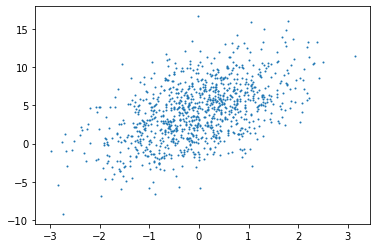

In [12]:
# w dan b asli hanya digunakan untuk generate data sintesis
w_asli = torch.tensor([2, -3.4])
b_asli = 4.2

# generate data sintesis
X, y = datasintetis(w_asli, b_asli, 1000)
print(X.shape, y.shape)

# scatter plot data sintesis
plt.scatter(X[:, (1)].detach().numpy(), y.detach().numpy(), 1)

### Membaca Dataset

In [24]:
def memuat_data(batch_size, X, y):
    # menghitung panjang data masukan
    banyaknya_data = len(X)
    # memberikan indeks dari data yang akan dijadikan mini-batch
    indices = list(range(banyaknya_data))
    # mengacak urutan data
    random.shuffle(indices)

    for i in range(0, banyaknya_data, batch_size):
        batch_indices = torch.tensor(indices[i: min(i + batch_size, banyaknya_data)])
        yield X[batch_indices], y[batch_indices]


batch_size = 10

for X, y in memuat_data(batch_size, X, y):
    print(X, '\n', y)

tensor([[ 1.2723, -1.1173],
        [-0.2460,  0.9216],
        [ 0.2172, -0.4112],
        [-0.8918, -0.7843],
        [ 1.6961,  0.3068],
        [-1.5289,  1.0749],
        [ 0.1610,  0.5516],
        [-1.6959, -1.5278],
        [-0.4608,  0.7742],
        [ 1.0372,  1.4203]]) 
 tensor([[10.4794],
        [ 0.7674],
        [ 5.8762],
        [ 5.0323],
        [ 6.6360],
        [-2.5137],
        [ 2.7582],
        [ 6.0208],
        [ 0.6454],
        [ 1.4371]])


Yield adalah salah satu cara kita untuk mengembalikan sebuah value dan menghentikan sementara eksekusi function yang sedang berjalan.

In [16]:
def simpleGeneratorFun():
    yield 1
    yield 2
    yield 3


for value in simpleGeneratorFun():
    print("Hasil dari yield adalah: ", value)


def simpleGenerator():
    yield 9
    return 8


for value in simpleGenerator():
    print("Hasil dari return adalah: ", value)

Hasil dari yield adalah:  1
Hasil dari yield adalah:  2
Hasil dari yield adalah:  3
Hasil dari return adalah:  9


### Inisiialisasi Weight, Bias, Model, Loss Function dan Optimizer

In [25]:
# inisiasi weight dan bias
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)


# menentukan model linear regression
def linreg(X, w, b):
    return torch.matmul(X, w) + b


# menentukan loss function
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.shape)) ** 2 / 2


# menentukan optimizer
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

### Melakukan Training

In [26]:
# menentukan learning rate dan epoch
lr = 0.01
epoch = 3

for epoch in range(epoch):
    for X, y in memuat_data(batch_size, X, y):
        # menghitung prediksi
        nilai_loss = squared_loss(linreg(X, w, b), y)
        # menghitung gradien
        nilai_loss.sum().backward()
        # mengupdate nilai weight dan bias
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        # menampilkan nilai loss
        print('Epoch {}, nilai loss: {:.2f}, nilai w: {:.2f}, nilai b: {:.2f}'
              .format(epoch + 1, nilai_loss.sum().item(), w[0].item(), b.item()))

Epoch 1, nilai loss: 133.39, nilai w: 0.03, nilai b: 0.04
Epoch 2, nilai loss: 131.21, nilai w: 0.04, nilai b: 0.07
Epoch 3, nilai loss: 129.07, nilai w: 0.06, nilai b: 0.11


Karena kita mengetahui nilai weight dan bias yang sesungguhnya, kita dapat mengkalkulasi prediksi yang benar dengan menggunakan model yang sudah kita buat.

In [44]:
# Menghitung error terhadap nilai weight dan bias yang sesungguhnya
print("Error dalam menghitung w: ", (w_asli - w.reshape(w_asli.shape)).data.numpy())
print("Error dalam menghitung b: ", (b - b_asli).norm().item())

Error dalam menghitung w:  [ 1.940784  -3.3344986]
Error dalam menghitung b:  4.089587211608887
